# Linear Regression
We are looking to predict continuous values and approximate data using a linear function to predict values. The model is: 

$\hat{y} = wx + b$

Where $w$ is the slope and $b$ is the bias (the y-intercept), and our approximation of the response variable $y$ is $\hat{y}$. We find the parameters by defining a cost function, which will be mean squared error (the average of the difference between predicted and actual values): 

$\text{MSE} = \frac{1}{N}\Sigma_{i=1}^{n}(y_i - (wx_i + b))^2$

There are actually many ways to achieve linear regression, which will be covered in this notebook. First, we will import relevant libraries and create a dataset for this notebook. 



In [6]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn import datasets 
import matplotlib.pyplot as plt 
%matplotlib inline 
seed = 2
np.random.seed(seed)

In [34]:
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=seed)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

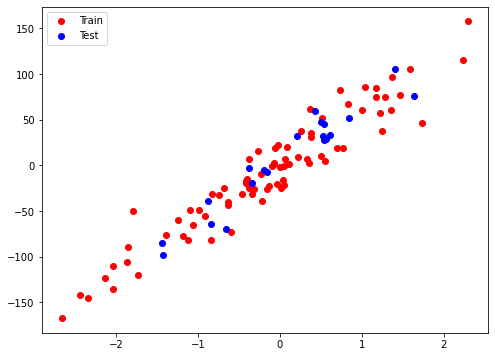

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X_train, y_train, color = "r")
ax.scatter(X_test, y_test, color = "b")
ax.legend(["Train", "Test"])
plt.show()

## Gradient Descent

Our objective is to find the minimum of this function. We will first do this using gradient descent - finding the derivatives of the gradient of the function with respect to the parameters $w$ and $b$: 

$\frac{df}{dw} = \frac{1}{N}\Sigma-2x_i(y_i-(wx_i+b))$

$\frac{df}{db} = \frac{1}{N}\Sigma-2(y_i-(wx_i+b))$

With each iteration of gradient descent, we will update our parameters based on the computed gradients by subtracting the gradient multiplied by a weighting learning rate, $\alpha$: 

$w = w-\alpha \cdot dw$

$b = b - \alpha \cdot db$

$dw = \frac{1}{N}\Sigma_{i=1}^{n}2x_i(\hat{y}-y_i)$

$db = \frac{1}{N}\Sigma_{i=1}^{n}2(\hat{y}-y_i)$

In [135]:
class LinearRegression:
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr = lr 
        self.n_iters = n_iters 
        self.weights = None
        self.bias = None 

    def fit(self, X, y):
        ''' Fitting by gradient descent '''
        # Initialise parameters
        n_samples, n_features = X.shape 
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Begin gradient descent
        for _ in range(self.n_iters):
            # Multiply X by weights and add bias to predict y for every sample
            y_predicted = np.dot(X, self.weights) + self.bias

            # Compute gradients
            # We must transpose as we do this along a different axis
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y) 

            # Update parameters
            self.weights -= self.lr * dw 
            self.bias -= self.lr * db


    def predict(self, X):
        ''' Given a new X, make a prediction for y '''
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

    def get_weights(self):
        return self.weights

Having made a linear regression class, we will initialise a model and fit it to the training data. We can also look at the performance of our model by looking at the MSE, and plot the results to visualise. 

In [136]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [137]:
linear_regressor = LinearRegression() 
linear_regressor.fit(X_train, y_train)
predictions = linear_regressor.predict(X_test)

In [138]:
mse_val = mse(y_test, predictions)
print(f"MSE of the model is: {mse_val}")

MSE of the model is: 267.07229029152353


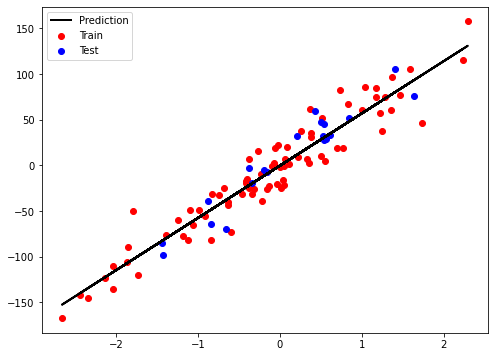

In [148]:
# Plot our model's regression line
pred_line = linear_regressor.predict(X)
fig = plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color = "r")
plt.scatter(X_test, y_test, color = "b")
plt.plot(X, pred_line, color='black', linewidth=2, label='Prediction')
plt.legend(["Prediction", "Train", "Test"])
plt.show()

## Singular Value Decomposition
We can use the SVD for a least squares linear regression model. Fundamentally, this is going to decompose our matrix $X$ into a series of matrices $U\Sigma V^T$. Our parameter values can be calculated by finding the pseudoinverse of the input matrix $X$ and multiplying that by the output vector $y$. 

In this example, we are going to have a predictor $a$ and a response variable $b$, which we believe to have a linear relationship, and we will attempt to find a best fit line with slope $x$ such that $ax=b$ where our solution for $x$ minimises the error along the line. 

We will start with data where we know the true slope, and thus build $b$ from this model, and then see if we can discover this slope. 

Everything here generalises to higher dimensions $Ax=b$ where there may be multiple columns in the $A$ matrix, and we can build a model of $b$ based on that. Essentially, we are building models from data, and we are going to build a model of the slope. 

<ipython-input-149-778603c6aa45>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(a, x*a, Color='k', LineWidth=2, label='True line') # This is the true relationship
<ipython-input-149-778603c6aa45>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(a, b, 'x', Color='r', MarkerSize=10, label='Noisy data') # The data points for a against b
<ipython-input-149-778603c6aa45>:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(a, xtilde*a, '--', Color='b', LineWidth=4, label='Regression line')
Our predicted value for x is [[3.22082035]]


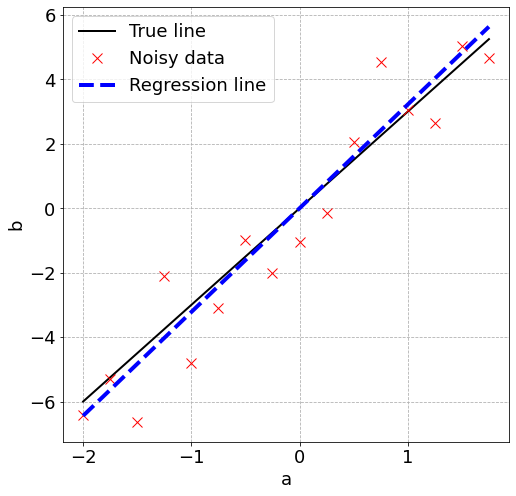

In [149]:
import matplotlib.pyplot as plt 
import numpy as np 
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

x = 3 # True slope
a = np.arange(-2, 2, 0.25) # Vector -2 to 1.75 in 0.25 increments (-2, -1.75, -1.5...1.75)
a = a.reshape(-1, 1) # Turns it into a list of scalars
b = x*a + np.random.randn(*a.shape) # Create b with noise, list of scalars that follows the trend ax = b

plt.plot(a, x*a, Color='k', LineWidth=2, label='True line') # This is the true relationship
plt.plot(a, b, 'x', Color='r', MarkerSize=10, label='Noisy data') # The data points for a against b

# SVD
U, S, VT = np.linalg.svd(a, full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # This is our least squares model

print(f"Our predicted value for x is {xtilde}")

plt.plot(a, xtilde*a, '--', Color='b', LineWidth=4, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()

We will now use this same approach to plot a linear regression, but this time with multiple predictors in a larger dataset. This will use the Boston housing market data. This dataset has 13 attributes correlated with house price including crime rate and property tax rate with 506 homes, so we have a $506 \times 13$ matrix. 

We want to solve for $x$ in $Ax=b$, where we have the data for $A$ (the feature matrix) and the data for $b$ (house prices). Again, we solve for $x$ using the pseudoinverse. 

<ipython-input-150-71d2f5568ac6>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(y, Color='k', LineWidth=2, label='Housing Value') # This is the true relationship
<ipython-input-150-71d2f5568ac6>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(X@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
<ipython-input-150-71d2f5568ac6>:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(y, Color='k', LineWidth=2, label='Housing Value') # This is the true relationship
<ipython-input-150-71d2f5568ac6>:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(X[sort_ind,:]@x, '-o', Color='r', Lin

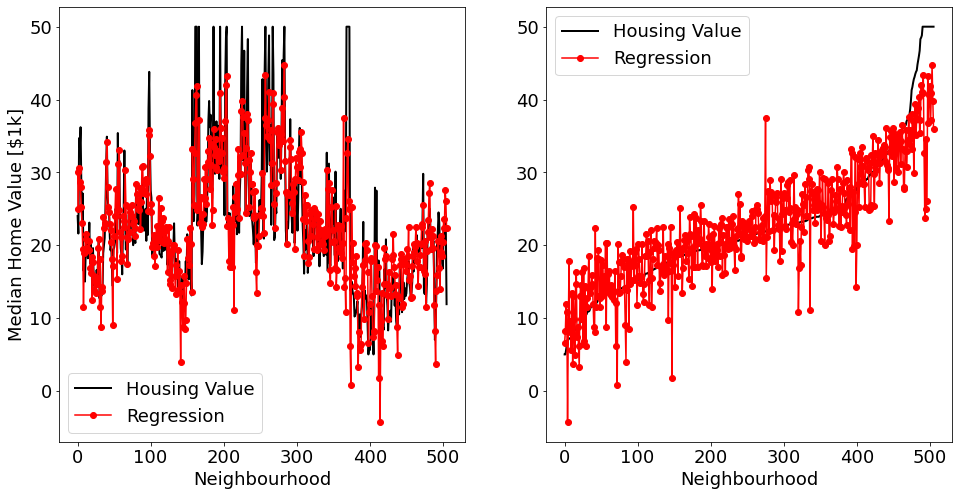

In [150]:
from sklearn.datasets import load_boston
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

X, y = load_boston(return_X_y=True) # X is features and y is target (house price in 1000s)
X = np.pad(X, [(0,0),(0,1)], mode='constant', constant_values=1) # Adds a column of 1s, lets us have a factor that is the mean and allows the model to have a non-zero intercept. 

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(X, full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ y

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(y, Color='k', LineWidth=2, label='Housing Value') # This is the true relationship
plt.plot(X@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighbourhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend() 

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(y) # Sorted targets
y = y[sort_ind]
plt.plot(y, Color='k', LineWidth=2, label='Housing Value') # This is the true relationship 
plt.plot(X[sort_ind,:]@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighbourhood')
plt.legend() 

plt.show()

## Conclusion 
There are several ways to create a linear regreession model. These different methods have different pros and cons, which are summarised in this table: 

|                      |                     **Good**                                                          |                           **Bad**                          |
|        ---           |                     ---                                                               |                           ---                              |
| **Gradient Descent** |          Time complexity is $O(kn^2)$                                                 |           Need to choose a learning rate $\alpha$          |
|                      |          Works with several features                                                  |           Can get stuck in local minima                    |
|                      |                                                                                       |           Not guaranteed to converge without good $\alpha$ |
|       **SVD**        |          Works well with high-dimensional data                                        |           Time complexity is $O(N^3)$                      |
|                      |          Stable and preferred for solving linear equations for linear regression      |           Sensitive to outliers                            |
|                      |          Good for Gaussian distributions                                              |           Unstable with large datasets                     |